In [ ]:
# Compare Dummy version Vs Satisfying version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("housing.csv")

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
# number of sample
m = 10
income_vs_price = df[["median_income","median_house_value"]].head(m).to_numpy()
income = income_vs_price[:,0]
price = income_vs_price[:,1]
price = price / 10000
print(f"income: {income[:5]}")
print(f"price: {price[:5]}")

income: [8.3252 8.3014 7.2574 5.6431 3.8462]
price: [45.26 35.85 35.21 34.13 34.22]


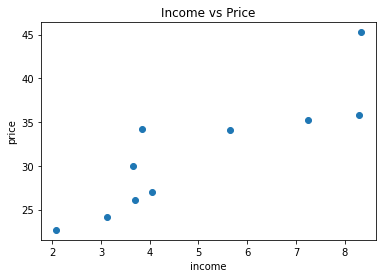

In [25]:
plt.scatter(income, price)
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()

In [26]:
income

array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12  ,
       2.0804, 3.6912])

In [27]:
# Dummy version
w = 1
b = 5
cost = 0
dj_dw = 0
dj_db = 0
alpha = 0.001
epochs = 50

for j in range(epochs):
    y_hats = []
    for i in range(m):
        y_hat = income[i] * w + b
        y_hats.append(y_hat)

    for i in range(m):
        cost += ((y_hats[i] - price[i]) ** 2)

    cost = cost / (2 * m)


    for i in range(m):
        dj_dw += (y_hats[i] - price[i]) * income[i]
        dj_db += (y_hats[i] - price[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    
    print(f"cost: {cost}, w: {w}, b: {b}")

cost: 241.363650523, w: 1.114665615854, b: 5.02145192
cost: 240.0298357788678, w: 1.2373091050094018, b: 5.0444547014899435
cost: 226.0843827461052, w: 1.357018675845832, b: 5.0669768296640925
cost: 212.29447617551887, w: 1.4727920724429409, b: 5.088830291785824
cost: 199.36957949910104, w: 1.5846484885118581, b: 5.110016620688921
cost: 187.30046841733207, w: 1.692708689042183, b: 5.130556206338057
cost: 176.03384833560253, w: 1.797099932896895, b: 5.150470700669483
cost: 165.5166257481181, w: 1.8979462672612635, b: 5.169781224369208
cost: 155.698961745662, w: 1.995367654454947, b: 5.1885082041278725
cost: 146.53430878662925, w: 2.089480008543995, b: 5.206671377468542
cost: 137.97921434826725, w: 2.18039532182902, b: 5.224289814144054
cost: 129.99311711021664, w: 2.2682217964839273, b: 5.241381938537978
cost: 122.53815477385668, w: 2.353063972715722, b: 5.257965551485855
cost: 115.5789844834703, w: 2.435022852687951, b: 5.274057851376351
cost: 109.08261517868627, w: 2.5141960202605556,

In [28]:
# Satisfying version
w = 0
b = 0
cost = 0
dj_dw = 0
dj_db = 0
alpha = 0.001
epochs = 50
history_cost = []

for j in range(epochs):

    y_hats = income * w + b

    costs = ((y_hats - price) ** 2)
    cost = sum(costs) / (2 * m)
    history_cost.append(cost)

    dj_dws = (y_hats - price) * income
    dj_dbs = (y_hats - price)

    dj_dw = sum(dj_dws) / m
    dj_db = sum(dj_dbs) / m
    
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    
    print(f"cost: {cost}, w: {w}, b: {b}")

cost: 515.5143700000001, w: 0.1691362231, b: 0.031448000000000004
cost: 486.36721404209175, w: 0.33312746720413533, b: 0.06201953389849456
cost: 458.96152415153045, w: 0.49212983770403074, b: 0.09174118288824683
cost: 433.19322821443546, w: 0.6462947036091943, b: 0.12063872166580222
cost: 408.9644735992448, w: 0.7957688412532269, b: 0.1487371429013286
cost: 386.183255472513, w: 0.9406945736398535, b: 0.17606068096601885
cost: 364.763067327032, w: 1.081209905561066, b: 0.20263283493958223
cost: 344.62257239483847, w: 1.217448654615657, b: 0.22847639091966712
cost: 325.6852946969974, w: 1.3495405782525316, b: 0.25361344365439525
cost: 307.8793285566461, w: 1.477611496959405, b: 0.27806541751854497
cost: 291.13706547191, w: 1.6017834137138438, b: 0.3018530868532975
cost: 275.39493731123946, w: 1.722174629810051, b: 0.32499659568885675
cost: 260.59317485572376, w: 1.8388998571713602, b: 0.3475154768686665
cost: 246.6755807712222, w: 1.952070327255063, b: 0.36942867059338114
cost: 233.58931

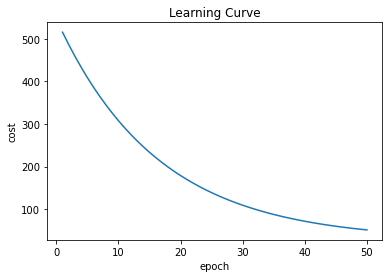

In [30]:
plt.plot(np.arange(epochs)+ 1, history_cost)
plt.title("Learning Curve")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

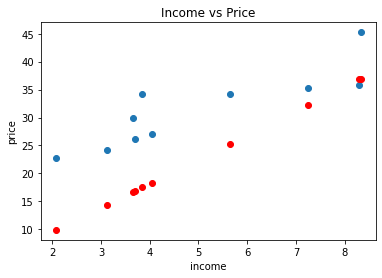

In [31]:
plt.scatter(income, price)
plt.scatter(income,y_hats, c = 'red')
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()